In [1]:
from platform import python_version
python_version()

'3.11.3'

In [2]:
import tensorflow as  tf

In [46]:
import os as os #for file structures

In [47]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [5]:
data_dir = '../ai model/ai2/train'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [6]:
os.listdir(os.path.join(data_dir,'cats'))

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [7]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

cat.0.jpg
cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg
cat.10009.jpg
cat.1001.jpg
cat.10010.jpg
cat.10011.jpg
cat.10012.jpg
cat.10013.jpg
cat.10014.jpg
cat.10015.jpg
cat.10016.jpg
cat.10017.jpg
cat.10018.jpg
cat.10019.jpg
cat.1002.jpg
cat.10020.jpg
cat.10021.jpg
cat.10022.jpg
cat.10023.jpg
cat.10024.jpg
cat.10025.jpg
cat.10026.jpg
cat.10027.jpg
cat.10028.jpg
cat.10029.jpg
cat.1003.jpg
cat.10030.jpg
cat.10031.jpg
cat.10032.jpg
cat.10033.jpg
cat.10034.jpg
cat.10035.jpg
cat.10036.jpg
cat.10037.jpg
cat.10038.jpg
cat.10039.jpg
cat.1004.jpg
cat.10040.jpg
cat.10041.jpg
cat.10042.jpg
cat.10043.jpg
cat.10044.jpg
cat.10045.jpg
cat.10046.jpg
cat.10047.jpg
cat.10048.jpg
cat.10049.jpg
cat.1005.jpg
cat.10050.jpg
cat.10051.jpg
cat.10052.jpg
cat.10053.jpg
cat.10054.jpg
cat.10055.jpg
cat.10056.jpg
cat.10057.jpg
cat.10058.jpg
cat.10059.jpg
cat.1006.jpg
cat.10060.jpg
cat.10061.jp

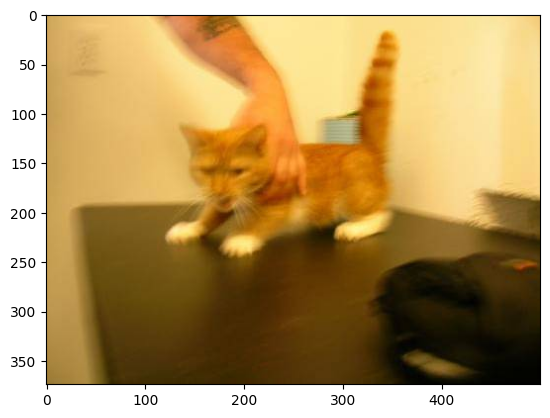

In [9]:
img = cv2.imread(os.path.join(data_dir,'cats','cat.0.jpg'))
img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [11]:
import numpy as np

In [12]:
data = tf.keras.utils.image_dataset_from_directory('../ai model/ai2/train')


Found 25000 files belonging to 2 classes.


In [13]:
data_itearator = data.as_numpy_iterator()

In [14]:
data_itearator

In [15]:
batch = data_itearator.next()

In [16]:
batch[1]

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

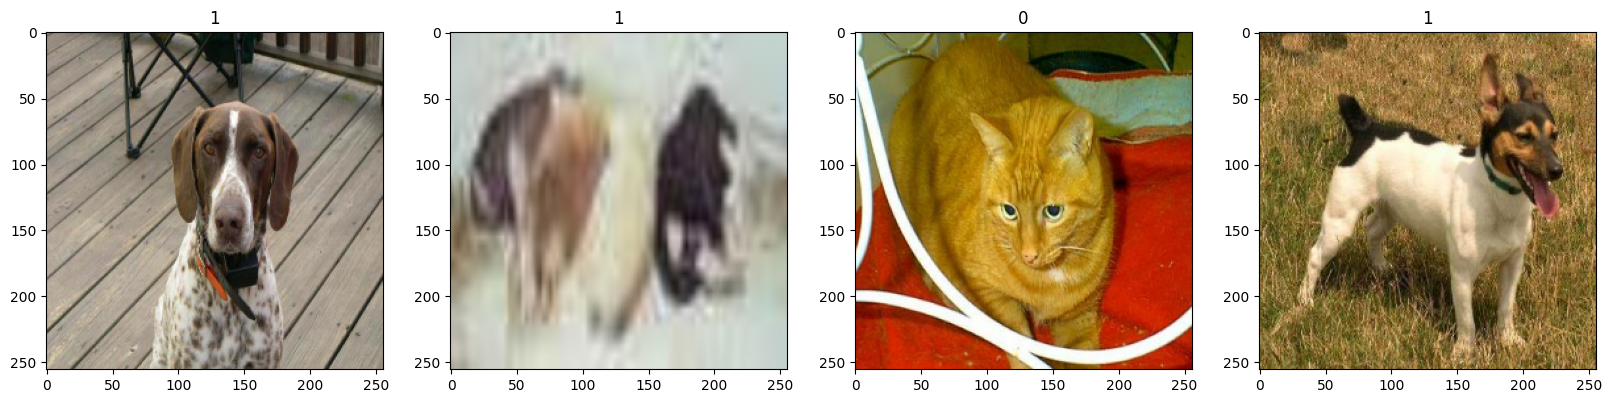

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
scaled_iterator = data.as_numpy_iterator()

In [20]:
batch = scaled_iterator.next()

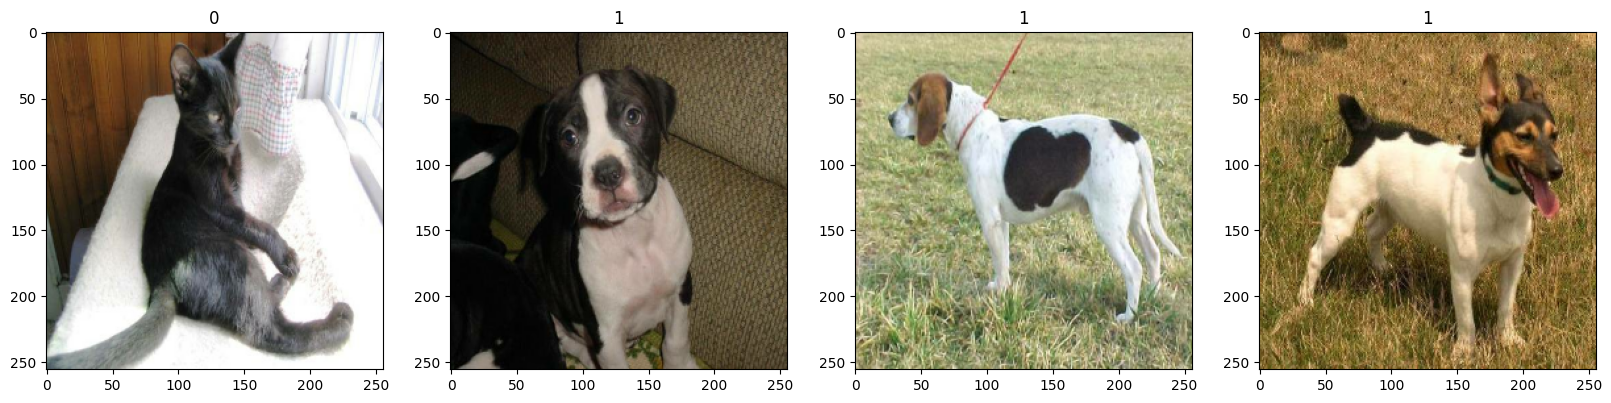

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [22]:
len(data)

782

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [24]:
train_size+val_size+test_size

783

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
len(test)

78

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [32]:
logdir='../ai model/log'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=4, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/4
547/547 [==============================] - 319s 580ms/step - loss: 0.6519 - accuracy: 0.6251 - val_loss: 0.6075 - val_accuracy: 0.6694
Epoch 2/4
547/547 [==============================] - 287s 524ms/step - loss: 0.5495 - accuracy: 0.7221 - val_loss: 0.5476 - val_accuracy: 0.7166
Epoch 3/4
547/547 [==============================] - 288s 526ms/step - loss: 0.4426 - accuracy: 0.7952 - val_loss: 0.5446 - val_accuracy: 0.7474
Epoch 4/4
547/547 [==============================] - 276s 505ms/step - loss: 0.2856 - accuracy: 0.8772 - val_loss: 0.6971 - val_accuracy: 0.7265


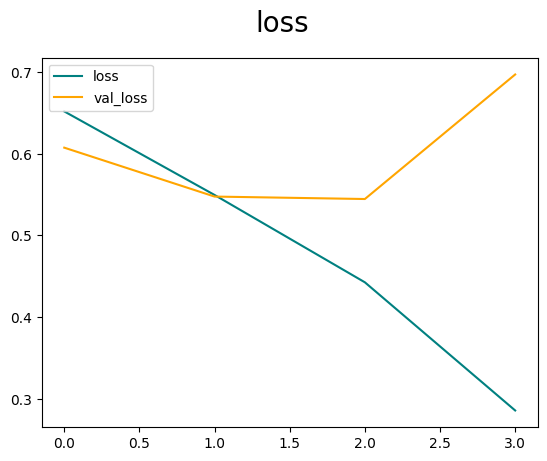

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

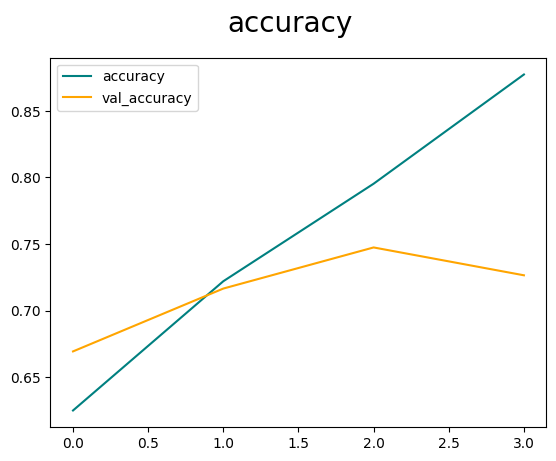

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

test

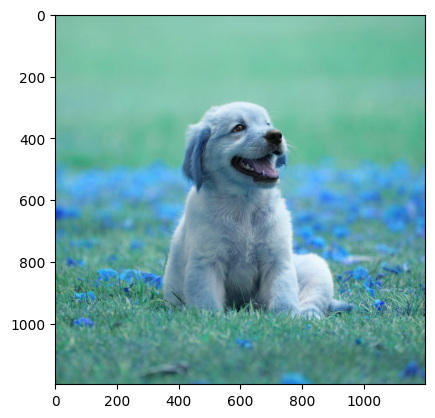

In [37]:
img = cv2.imread('dogtest.jpg')
plt.imshow(img)
plt.show()

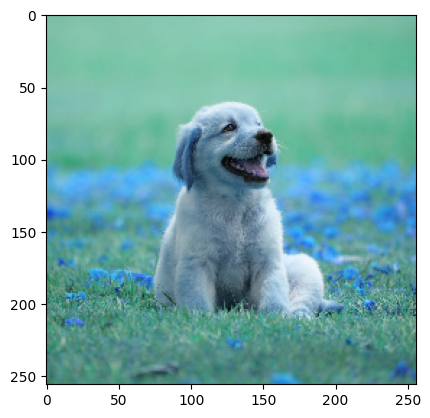

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0)) #expnad dimensions of the image as the model expects a batch of imgs not only one

1/1 [==============================] - 0s 104ms/step


In [40]:
yhat

array([[0.7046361]], dtype=float32)

In [41]:
if (yhat > 0.5):
    print("dog")
else:
    print("cat")

dog


In [42]:
from tensorflow.keras.models import load_model

In [43]:
#model serialization
model.save(os.path.join('models','catdogmodel.h5'))

In [44]:
#deserialize
new_model = load_model(os.path.join('models','catdogmodel.h5'))

In [45]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 66ms/step


array([[0.7046361]], dtype=float32)